# Display of the mission parameters DHC-6 Twin Otter 400 series

Twin Otter aircraft check

In [23]:
import os.path as pth

RESULT_FOLDER_PATH = "results"
OUTPUT_FILE = pth.join(RESULT_FOLDER_PATH, "oad_process_outputs_ref.xml")

In [24]:
import os.path as pth

import fastoad.api as oad
import fastga.utils.postprocessing.post_processing_api as api_plots

# For using all screen width
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

C:\Users\c.liu\AppData\Local\Temp\ipykernel_9924\1401452210.py:7: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



In [31]:
from fastoad import api as api_cs25

ottor400_MDA_OUTPUT_FILE = pth.join(
    RESULT_FOLDER_PATH, "oad_process_outputs_ref.xml"
)

otter400_topview = pth.join(RESULT_FOLDER_PATH, "DHC-6 twin otter 400s.png")
api_cs25.variable_viewer(OUTPUT_FILE)

C:\Users\c.liu\Anaconda3\envs\FAST_GA_HE\lib\site-packages\fastoad\_utils\strings.py:56: UserWarning:

genfromtxt: Empty input file: "<_io.StringIO object at 0x0000021AED941AF0>"



C:\Users\c.liu\Anaconda3\envs\FAST_GA_HE\lib\site-packages\fastoad\_utils\strings.py:56: UserWarning:

genfromtxt: Empty input file: "<_io.StringIO object at 0x0000021AED1F7AF0>"



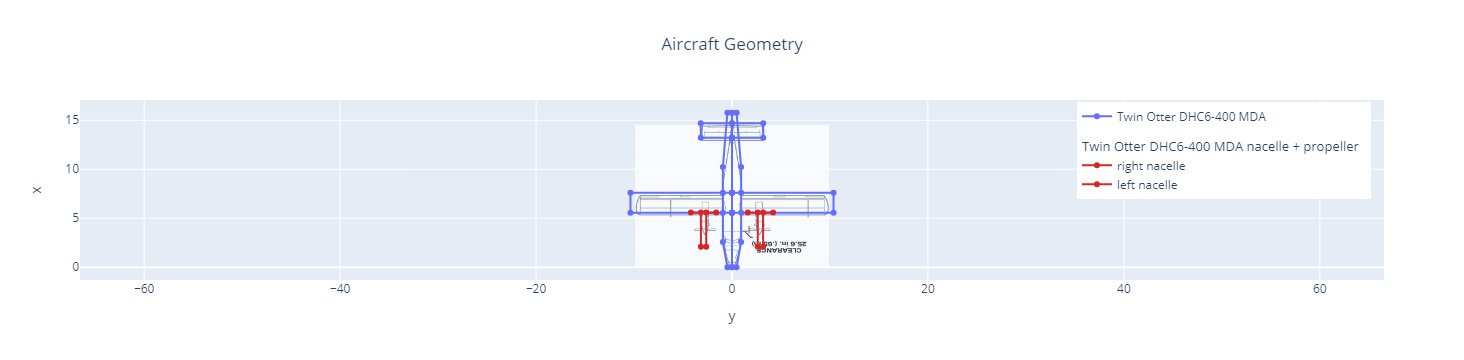

In [30]:
from PIL import Image

fig = api_plots.aircraft_geometry_plot(ottor400_MDA_OUTPUT_FILE, name="Twin Otter DHC6-400 MDA")
top_view = Image.open(otter400_topview)
fig.add_layout_image(
    dict(
        source=top_view,
        xref="x",
        yref="y",
        y=14.55,
        x=-19.81 / 2,
        sizex=19.81,
        sizey=14.55,
        sizing="stretch",
        opacity=0.75,
        layer="below",
    )
)

fig.show()

In [ ]:
import os.path as pth
import logging
import shutil

import fastoad.api as oad
import fastga_he.api as oad_he

DATA_FOLDER_PATH = "data"
RESULTS_FOLDER_PATH = "results"
WORK_FOLDER_PATH = "workdir"

CONFIGURATION_FILE = pth.join(DATA_FOLDER_PATH, "full_sizing_tbm900.yml")
PT_FILE = pth.join(DATA_FOLDER_PATH, "turboshaft_propulsion.yml")
# The following PT file is not used for sizing just to try out the network function

# For having log messages on screen
logging.basicConfig(level=logging.WARNING, format="%(levelname)-8s: %(message)s")

In [ ]:
NETWORK_FILE = pth.join(WORK_FOLDER_PATH, "pipistrel_assembly.html")

oad_he.power_train_network_viewer(power_train_file_path=PT_FILE, network_file_path=NETWORK_FILE)

from IPython.display import IFrame

# For some reason, this doesn't display icon. Opening it in Firefox does the trick.
IFrame(src=NETWORK_FILE, width="100%", height="500px")

In [ ]:
MISSION_DATA_FILE = pth.join(RESULTS_FOLDER_PATH, "turboshaft_propulsion.csv")
PT_DATA_FILE = pth.join(RESULTS_FOLDER_PATH, "fuel_propulsion_pt_watcher.csv")

perfo_viewer = oad_he.PerformancesViewer(
    power_train_data_file_path=PT_DATA_FILE,
    mission_data_file_path=MISSION_DATA_FILE,
    plot_height=800,
)

# Comparaison of design mission with OP mission

In [ ]:
OP_MISSION_DATA_FILE = pth.join(RESULTS_FOLDER_PATH, "turboshaft_propulsion_op_mission.csv")
OP_PT_DATA_FILE = pth.join(RESULTS_FOLDER_PATH, "fuel_propulsion_pt_watcher_op_mission.csv")

perfo_viewer = oad_he.PerformancesViewer(
    power_train_data_file_path=OP_PT_DATA_FILE,
    mission_data_file_path=OP_MISSION_DATA_FILE,
    plot_height=800,
)

# EcoPulse retrofit analysis

In [ ]:
OP_MISSION_DATA_FILE = pth.join(RESULTS_FOLDER_PATH, "turbo_electric_propulsion.csv")
OP_PT_DATA_FILE = pth.join(RESULTS_FOLDER_PATH, "turbo_electric_propulsion_pt_watcher.csv")

perfo_viewer = oad_he.PerformancesViewer(
    power_train_data_file_path=OP_PT_DATA_FILE,
    mission_data_file_path=OP_MISSION_DATA_FILE,
    plot_height=800,
)

# EcoPulse new wing

In [ ]:
OP_MISSION_DATA_FILE = pth.join(RESULTS_FOLDER_PATH, "ecopulse_powertrain_new_wing.csv")
OP_PT_DATA_FILE = pth.join(RESULTS_FOLDER_PATH, "ecopulse_powertrain_new_wing_pt_watcher.csv")

perfo_viewer = oad_he.PerformancesViewer(
    power_train_data_file_path=OP_PT_DATA_FILE,
    mission_data_file_path=OP_MISSION_DATA_FILE,
    plot_height=800,
)

# EcoPulse new wing mission analysis

In [ ]:
ECOPULSE_MA_MISSION_DATA_FILE = pth.join(
    RESULTS_FOLDER_PATH, "ecopulse_powertrain_new_wing_mission_analysis.csv"
)
ECOPULSE_MA_PT_DATA_FILE = pth.join(
    RESULTS_FOLDER_PATH, "ecopulse_powertrain_new_wing_pt_watcher_mission_analysis.csv"
)

perfo_viewer = oad_he.PerformancesViewer(
    power_train_data_file_path=ECOPULSE_MA_PT_DATA_FILE,
    mission_data_file_path=ECOPULSE_MA_MISSION_DATA_FILE,
    plot_height=800,
)

In [4]:
original_DHC6_MISSION_FILE = pth.join(RESULT_FOLDER_PATH, "turboshaft_propulsion.csv")
hybrid_only_climb_DHC6_FILE = pth.join(RESULT_FOLDER_PATH, "turboshaft_pemfc_hybrid_propulsion.csv")

mission = oad.MissionViewer()
mission.add_mission(original_DHC6_MISSION_FILE, name="Original_DHC6")
mission.add_mission(hybrid_only_climb_DHC6_FILE, name="Hybrid_DHC6")

mission.missions["Original_DHC6"]
mission.display()

Output()